# 1、基础


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0752 -0.7430 -0.4582  0.8026  1.7954 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.4352     0.7306  -0.596    0.568    
x             0.9969     0.1177   8.467  2.9e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.069 on 8 degrees of freedom
Multiple R-squared:  0.8996,	Adjusted R-squared:  0.8871 
F-statistic: 71.68 on 1 and 8 DF,  p-value: 2.897e-05


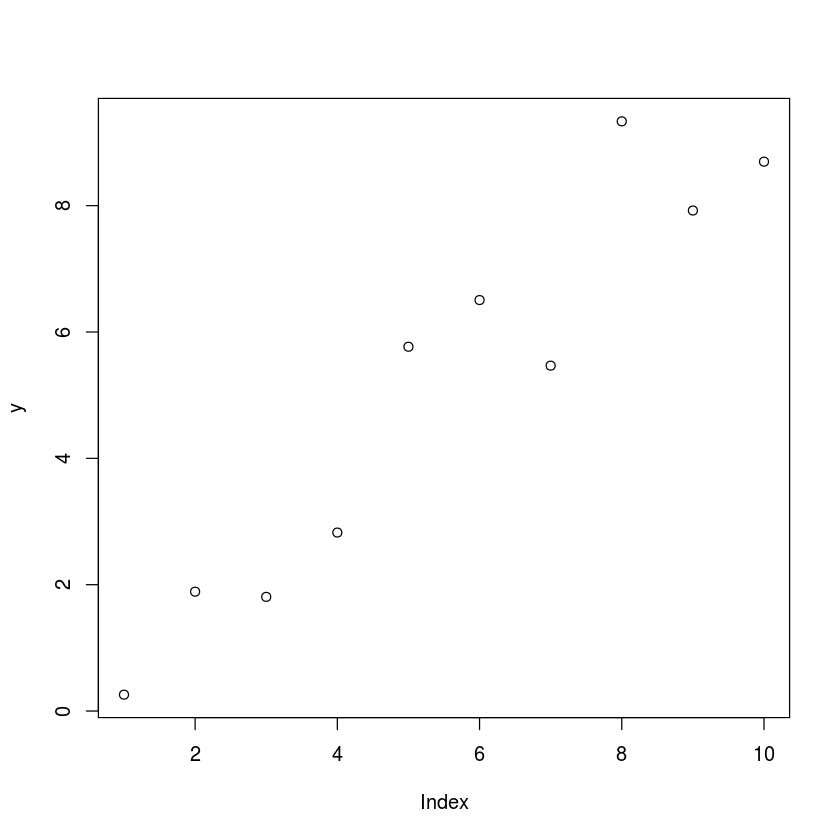

In [1]:
x=1:10
y=x+rnorm(10,0,1)
fit=lm(y~x)
summary(fit)
plot(y)

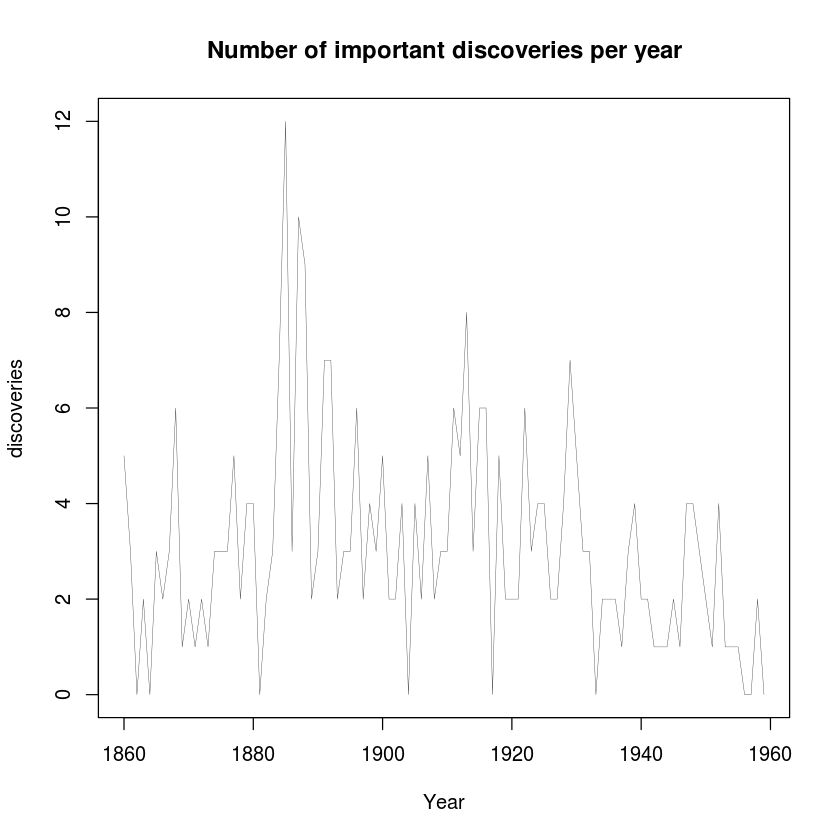

In [2]:
data("discoveries")
plot(discoveries,col="#333333",lwd=0.3,xlab="Year",main="Number of important discoveries per year")

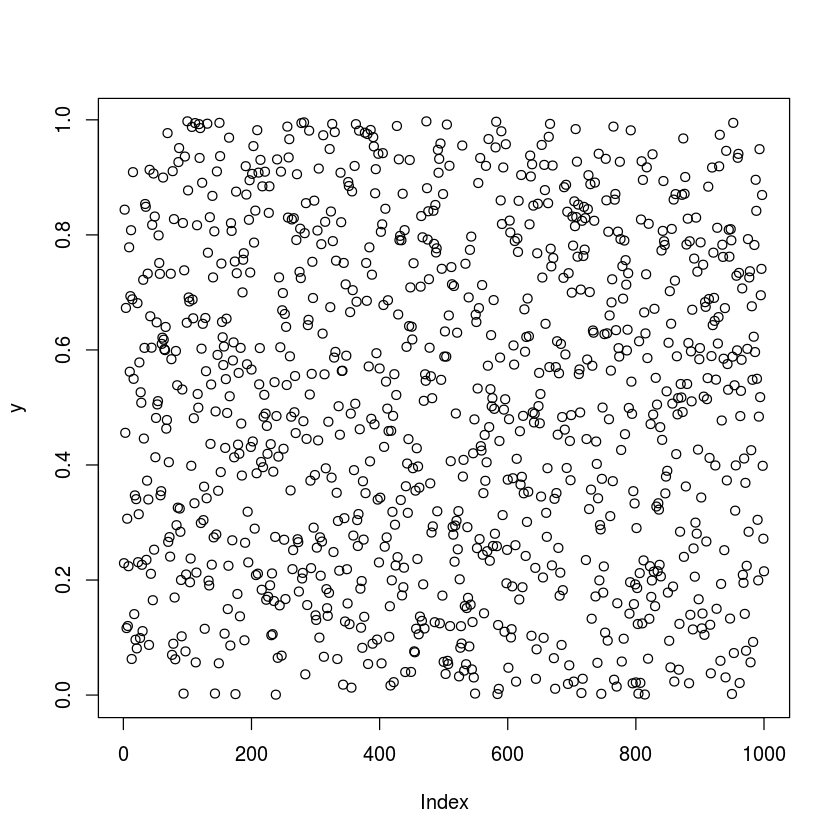

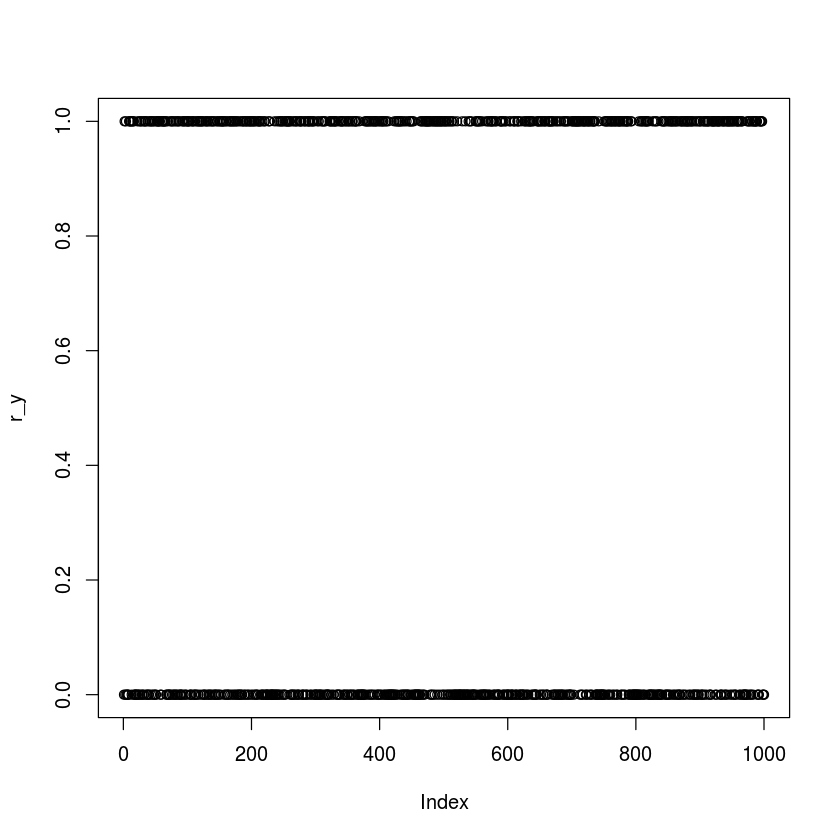

In [1]:
y=runif(1000,min=0,max=1)#y=rnorm(1000)
r_y=round(y)
plot(y)
plot(r_y)

In [ ]:
5L#长整型用L结尾
class(5L)

In [ ]:
1+2.0
6.66-0.06
6*8
9/5
10%%3#没有10%3这种运算

In [ ]:
#特殊数值类型
class(NaN)
class(Inf)#例如会在积分中用到：integrate(dnorm,3,Inf)
class(NA)#"logical"
class(NULL)

In [ ]:
#简单列表
c(1,2,3,4,5,6,7,8)
c('a','b','c','d')
c('a','b','c','d')=='abcd'
c('a','b','c','d')=='a'

In [ ]:
#序列生成以及一些有趣的序列
1:10
seq(from=0,to=100,by=2)
letters
LETTERS
month
month.name
month.abb

In [ ]:
letters[8]
month.name[8]
c(1,2,3,4,5,6,7,8)[8]
(1:10)[8]
seq(from=0,to=100,by=2)[8]

In [ ]:
#字符串和字符在R语言中没有区别(character)
'Harbes'
class('Harbes')
substr("My name is Harbes",12,18)#选取第12-18位的字符串
gsub('a','A',"My name is Harbes")#将所有”a“替换成”A“

In [ ]:
#逻辑值：布尔值+NA
class(TRUE)
class(FALSE)
class(NA)
TRUE==TRUE
TRUE==1
TRUE==c(0)
TRUE!=FALSE
TRUE!=NA# use "is.na" to check whether expression evaluates NA
is.na(NA)#TRUE


In [ ]:
#因子(为数据分类排序设计的)
list=c(1,2,3,'a',1,2,3,'a','b','c')#当存在字符串时，list中所有元素均为”character“
list2=c(1,2,3)#元素为”numeric“
f=factor(list)
levels(f)

In [ ]:
#自带数据
data(infert)#加载数据{自然以及引产导致的不育症}
infert$education

In [ ]:
#赋值
x=5
y<- "1" #推荐
1->z #可行，但很怪

In [ ]:
#转变数据类型
as.numeric(y)
as.character(x)

In [ ]:
#for循环【注意，无论if还是while循环，都很慢。推荐使用apply()来操作一串数据】
for (i in 1:8){
    print(i)
}
#或者
for (i in 1:9){print(i)}

In [ ]:
# while 循环
a=10
while(a>0){cat(a,"...",sep='');a=a-1}
#或者
while(a>-10){
    cat(a,"...",sep='')
    a=a-1
}

In [ ]:
#if/else
if (4>3){
    print('Yes!')
}else{
    print('No!')
}

In [ ]:
#函数
jiggle=function(x){
    x=x+rnorm(1,sd=.1)
    return(x)
}
set.seed(2716057)
jiggle(5)

# 2、数据容器
常用的有：vactors,matrices,data frames,arrays

In [ ]:
vec=c(1,2,3,4)
c(TRUE,8)
c('Harbes',TRUE,8)

In [ ]:
#数据索引与切片
vec[1]
which(vec%%2==0)
head(vec,1)
tail(vec,1)
vec[6]#c超出索引范围，NA
length(vec)
vec[2:3]
vec*4


In [ ]:
#一些内置函数
mean(vec)
sum(vec)
var(vec)
sd(vec)
abs((sd(vec))^2-var(vec))<1e-8
max(vec)
min(vec)

In [ ]:
mat=matrix(nrow=6,ncol=8,1:48)
mat
class(mat)
mat[1,]
mat[,1]
mat[6,6]
t(mat)
mat2=cbind(matrix(nrow=4,ncol=2,1:8),7:10)#把两个矩阵按列合并

In [ ]:
df=data.frame(c(6,7,8,9),c('dog','cat','bird','dog'))
names(df)=c('number','species')
class(df)
df
df$number
df[,1]
df[,'number']
class(df$number)
df[,2]
class(df[,2])#"factor",data.frame()会将字符向量转换为factor向量

In [ ]:
array(c(c(1,2,3,4),c(8,9,3,6)),dim=c(2,4))
array(c(c(c(2,300,4),c(8,9,0)),c(c(5,6,0),c(66,7,8))),dim=c(3,2,2))

In [ ]:
#列表(多维，允许不同类型)
list1=list(time=1:40)
list1$price=c(rnorm(40,0.5*list1$time,4))
list1

# 3、apply()函数组
主要包括：apply(),lapply(),sapply()

In [ ]:
#用法apply(x,MAR,function),其中，将function应用到行或者列，MAR=1表示行，MAR=2表示列
mat
myFun=function(x){return(x%%2)}
apply(mat,MAR=2,myFun)
?lapply
?sapply

In [ ]:
#plyr程序包的作用是用来改进apply()函数族
#install.packages("plyr")
require(plyr)
?plyr

# 4、载入数据

In [ ]:
#读取网上的一个文本
pets=read.csv("http://learnxinyminutes.com/docs/pets.csv")
head(pets,2)#前两行

In [ ]:
#保存数据
write.csv(pets,"pets.csv")

# 5、画图

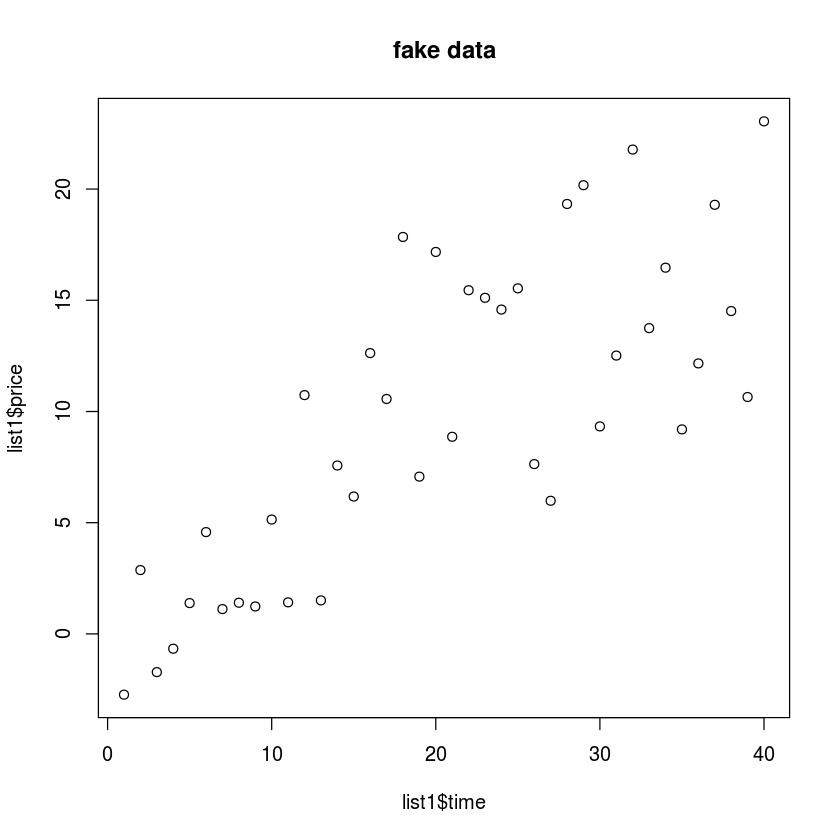

In [2]:
#散点图
plot(list1$time,list1$price,main='fake data')


Call:
lm(formula = price ~ time, data = list1)

Coefficients:
(Intercept)         time  
     0.2089       0.4662  


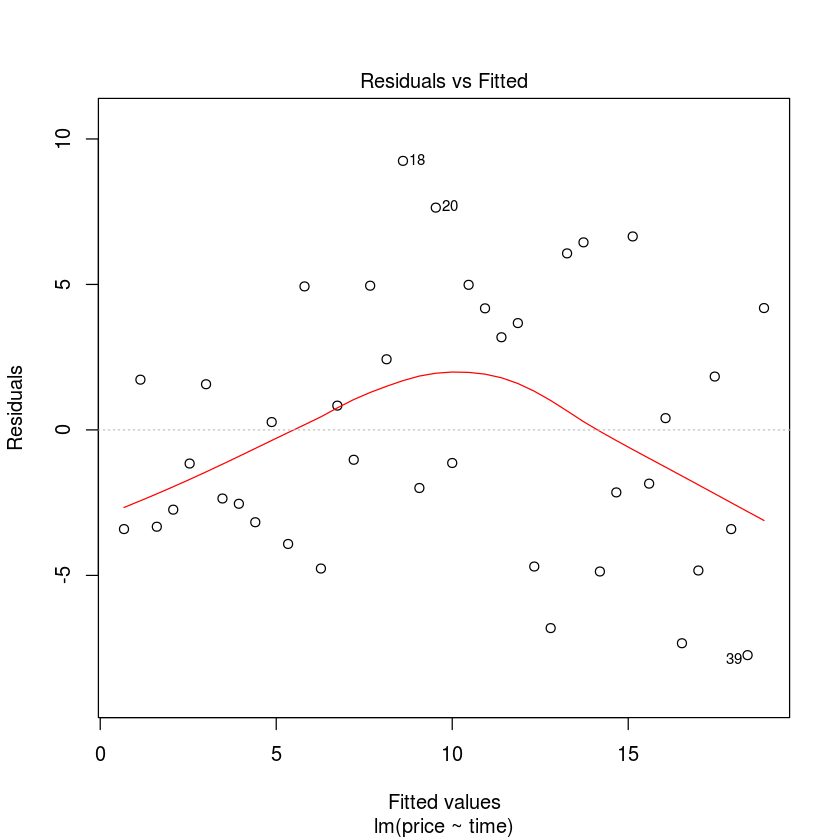

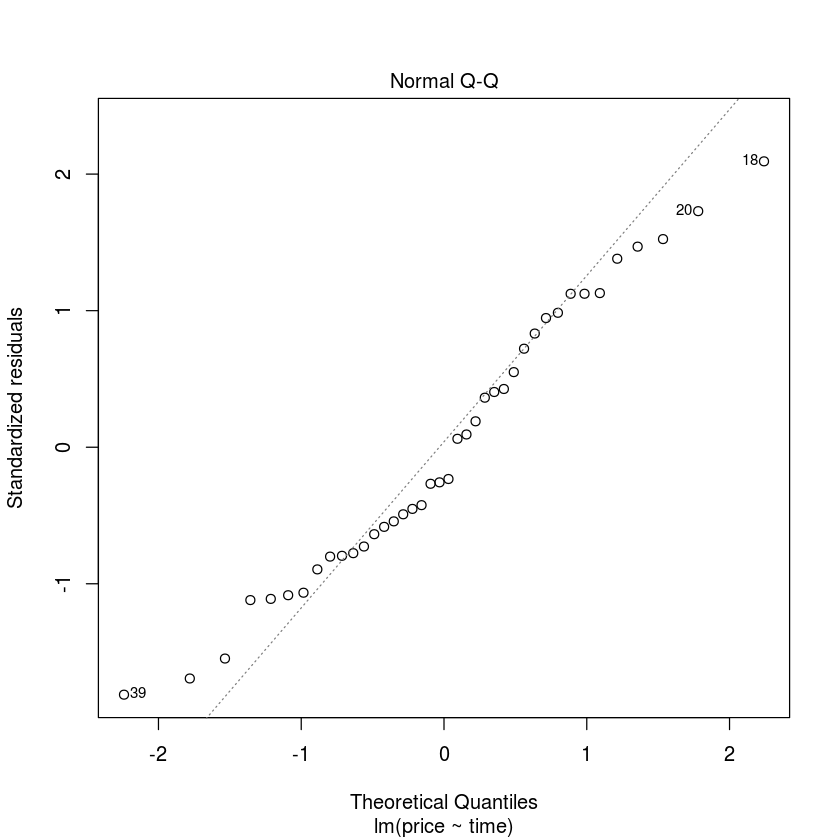

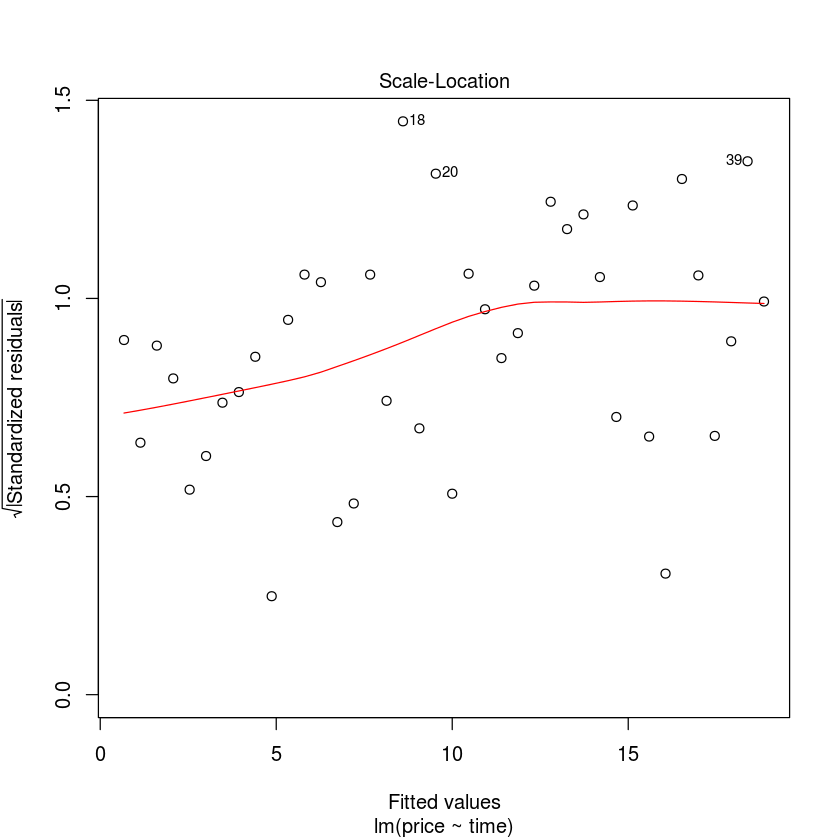

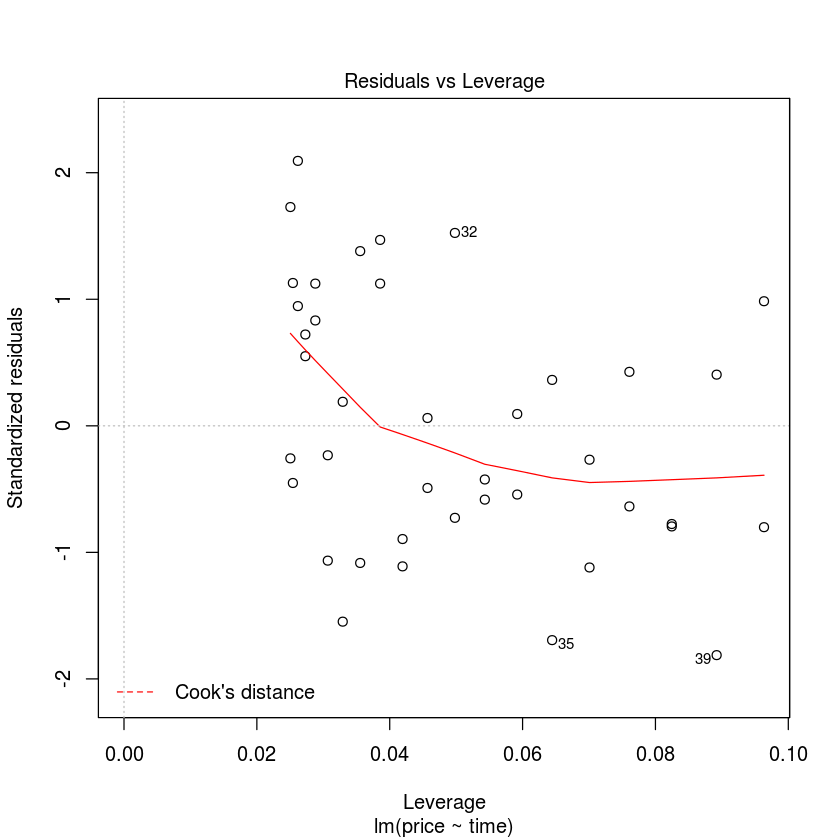

In [5]:
#回归图
linearModel=lm(price~time,data=list1)
linearModel#拟合结果
#abline(linearModel)#展示拟合结果
plot(linearModel)

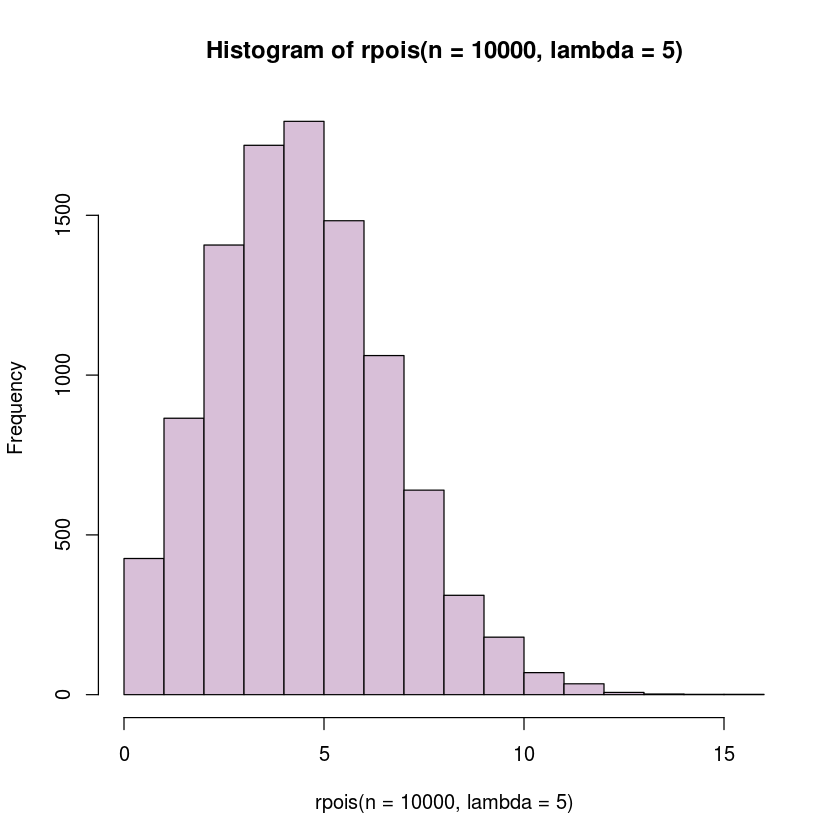

In [6]:
#直方图
hist(rpois(n=10000,lambda=5),col='thistle')

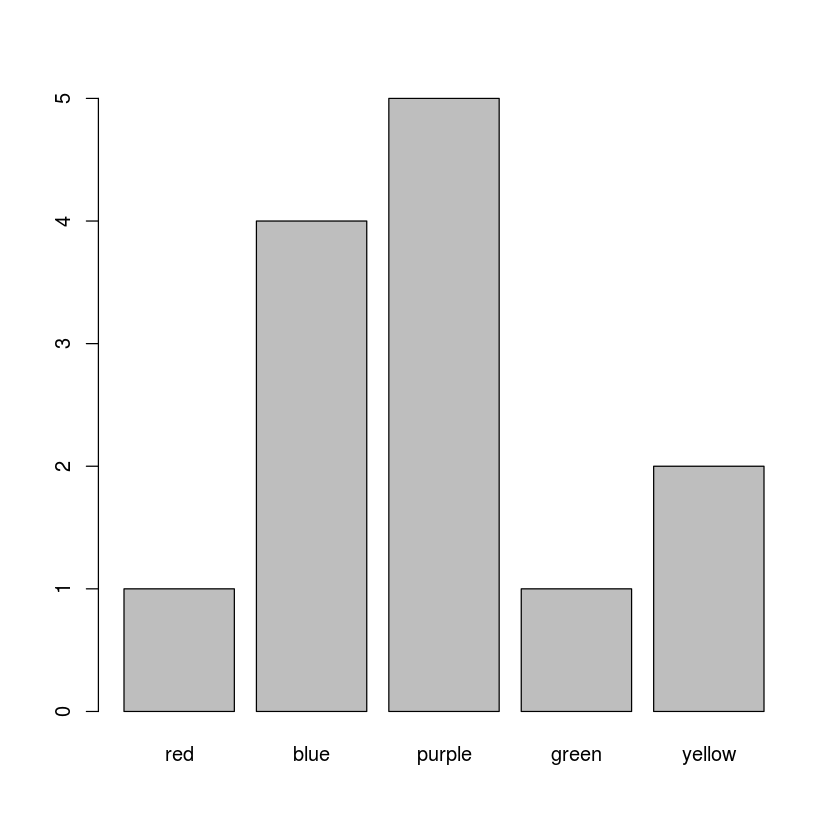

In [7]:
#柱状图
barplot(c(1,4,5,1,2),names.arg=c('red','blue','purple','green','yellow'))